<a href="https://colab.research.google.com/github/ranjan2829/Mini-ML-Projects/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader,TensorDataset
digits=load_digits()
X=digits.data


In [5]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_tensor=torch.tensor(X_scaled,dtype=torch.float32)
batch_size=32
dataset=TensorDataset(X_tensor,X_tensor)
dataloader=DataLoader(dataset,batch_size=batch_size,shuffle=True)

In [6]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    self.encoder=nn.Sequential(
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,16),
        nn.ReLU(),
        nn.Linear(16,8)
    )
    self.decoder=nn.Sequential(
        nn.Linear(8,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded
model=Autoencoder()

In [8]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)
num_epochs = 50
for epoch in range(num_epochs):
  for data in dataloader:
    inputs,_=data
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,inputs)
    loss.backward()
    optimizer.step()
  if epoch % 10 == 0:
    print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")



Epoch [0/50], Loss: 0.0699
Epoch [10/50], Loss: 0.0317
Epoch [20/50], Loss: 0.0191
Epoch [30/50], Loss: 0.0165
Epoch [40/50], Loss: 0.0237


In [11]:
with torch.no_grad():
  X_compressed=model.encoder(X_tensor).numpy()
from sklearn.decomposition import PCA
X_pca=PCA(n_components=2).fit_transform(X_compressed)


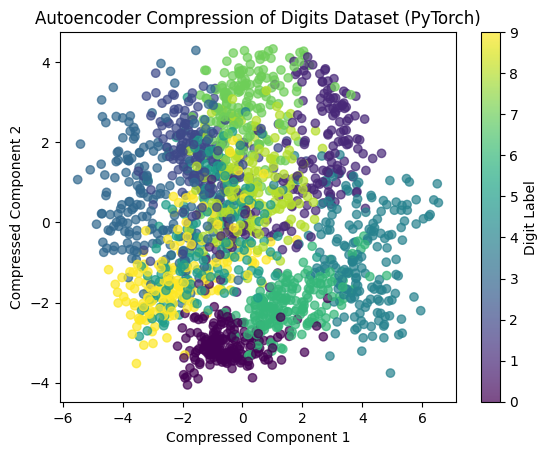

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap="viridis", alpha=0.7)
plt.xlabel("Compressed Component 1")
plt.ylabel("Compressed Component 2")
plt.colorbar(label="Digit Label")
plt.title("Autoencoder Compression of Digits Dataset (PyTorch)")
plt.show()